# Exercise 02 - `numpy` and `scipy` tutorial

We continue our tutorial, introducing some more advanced concepts that we will need throughout our course. Rather than on basic concepts of `python` and `pathpy`, the focus of this week's tutorial is on modules that provide mathematical and statistical funcionality that we will need in the following week. To this end, I will introduce basics of the packages `numpy` and `scipy`, which are already included in the Anaconda `python` distribution. If you have not installed Anaconda, make sure to manually install `numpy` and `scipy` via `pip` as follows: 

```
pip install numpy
pip install scipy
```


## 1. Introduction to `numpy`

`numpy` is a powerful numerics packages for python. We will, for instance, extensively use random number generation functions of `numpy`, whenever we generate random networks on which we can test out statistical methods. I wfurther introduce some basics of vectors and matrices, that we can use to mathematically represent and analyse networks in terms of adjacency matrices.
    
The simplest `numpy` function to generate random  integer values from a given range uniformly at random is the `randint` method, which you can find in the submodule `random`. It takes two parameters low and high and returns a random integer from the interval `[low,high)`, i.e. the low limit is inclusive, while the high limit is exclusive.

<span style="color:red">**TODO**: Generate a random integer from the closed interval `[0,9]`.</span>

In [11]:
import numpy as np

r = np.random.randint(0,10)
print("Generated random number", r)

Generated random number 3


Another important method is the `random()` function, which generates a random float value from the interval `[0,1)` uniformly at random. We can use it to perform random Bernoulli trials like, e.g. flipping a (biased) coin.

<span style="color:red">**TODO**: Generate a sequence of 100 random coin flips, where heads shows with probability `p=0.7`. Output the number of heads and tails in your experiment</span>

In [12]:
heads = 0
tails = 0

for x in range(100):
    head = np.random.random()<0.7
    if head:
        heads = heads+1
    else:
        tails = tails+1

print("Heads =", heads, ", Tails =", tails)

Heads = 72 , Tails = 28


We often need to randomly sample elements from a collection of objects. For such *urn experiments* we can use the function `np.random.choice()`, which takes an arbitrary `python` iterable (e.g. a list, set, tuple, or dictionary key/values) as parameter.

<span style="color:red">**TODO**: Generate a `networkx` `Graph` and sample a node uniformly at random.</span>

We randomly selected node 'b'


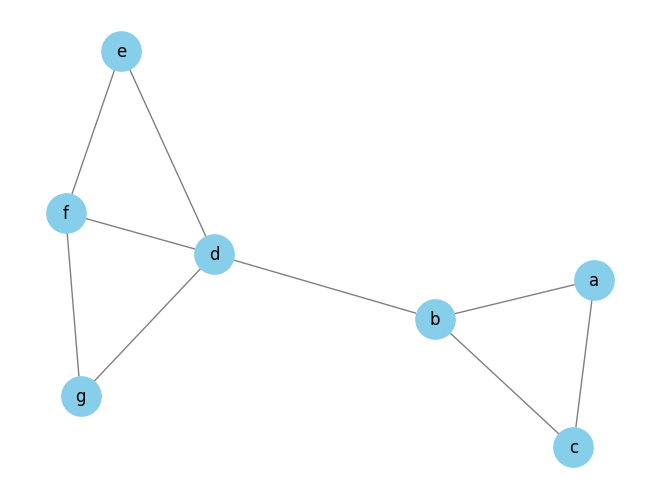

In [13]:
import networkx as nx
# Create a directed graph
G = nx.Graph()

# Add edges to the graph (nodes are created automatically)
G.add_edge('a', 'b')
G.add_edge('b', 'c')
G.add_edge('a', 'c')
G.add_edge('b', 'd')
G.add_edge('d', 'f')
G.add_edge('d', 'g')
G.add_edge('d', 'e')
G.add_edge('e', 'f')
G.add_edge('f', 'g')

# Visualise the graph using a spring layout
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=800, arrows=True)

# Randomly select a node from the graph
print("We randomly selected node '{0}'".format(np.random.choice(list(G.nodes))))



`numpy` provides support for vectors, matrices, and various kinds of algebraic operations. A vector of real-values values can be defined using the constructor of the class `array`. It takes an iterable as argument.

<span style="color:red">**TODO:** Create a vector with three dimensions</span>

In [14]:
v = np.array([1,0,0])
[1,0,0]+[1]

[1, 0, 0, 1]

If we want to generate a vector with a given number of (identical) values (e.g. an n-dimensional zero-vector) we can use a shorter notation for a list with repeated elements. Rather than repeating the element `x` `n` times in the definition of the list, we can simpy write `[x]*n`.

<span style="color:red">**TODO:** Create a zero-vector with 20 elements</span>

In [15]:
v = np.array([0]*20)
print(v)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


One way to use vectors is for the definition of discrete probability mass functions. That is, we define a vector where entries are the probabilities of events. We can use this to perform an urn experiment where the different elements have non-uniform probabilities to be drawn. For this, we can again use the `choice` function from above, but now we pass an `array` where the entries are the probabilities to draw the different elements in the iterable. We will use this to implement different node sampling strategies.

<span style="color:red">**TODO**: Sample a node randomly with a probability that is proportional to the node degrees.</span>

In [16]:
# Compute the degree for each node.
degrees = np.array([G.degree(node) for node in G.nodes()])

# Normalize by the sum of all degrees (which equals 2*|E| for an undirected graph)
probs = degrees / (2 * G.number_of_edges())

print(list(G.nodes()))
print(probs)

print("We randomly selected node `{0}`".format(np.random.choice(list(G.nodes()), p=probs)))

['a', 'b', 'c', 'd', 'f', 'g', 'e']
[0.11111111 0.16666667 0.11111111 0.22222222 0.16666667 0.11111111
 0.11111111]
We randomly selected node `f`


Apart from vectors, we can also define matrices using the `numpy` class `matrix`. We can use the constructor in different ways to define a matrix. A simple method uses a string encoding of a matrix, where the entries of matrix rows are separated by spaces, while columns are separated by semicolons.

<span style="color:red">**TODO:** Create a 3x3 identity matrix.</span>

In [17]:
m = np.matrix('1 0 0; 0 1 0; 0 0 1')
m

matrix([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

A diagonal matrix like the one above, can also be generated with the function `diag`, which takes as an argument an `array` that contains the diagonal elements.

<span style="color:red">**TODO:** Use the `diag` function to create a 3x3 identity matrix.</span>

In [18]:
m = np.diag([1,1,1])
m

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

Finally, we can use the `zeros()` function to generate an arbitrarily-shaped matrix that only contains zeros. Here we have to pass a `shape` tuple that specifies the dimensions of the matrix.

<span style="color:red">**TODO:** Create a 3x3 matrix containing all zeros.</span>

In [19]:
m = np.zeros(shape=(3,3))
m

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

We can now set the diagonal elements to one simply by assigning values to the diagonal matrix elements.

<span style="color:red">**TODO:** Create a 3x3 matrix identity matrix by iterating through the diagonal elements of the zero matrix.</span>

In [20]:
for i in range(3):
    m[i,i] = 1
m

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

By the way: We can also use the matrix class to generate tensors. We can simply use the `zeros` function, passing a shape that has more than two dimensions:

<span style="color:red">**TODO:** Create a 5x3x3 tensor with zero elements.</span>

In [21]:
tensor = np.zeros(shape=(5,3,3))
tensor

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

We can multiply a matrix with a vector (or another matrix) by using the `np.dot()` function, which computes the dot-product between scalars, vectors and matrices.  If we compute the product $p = v \cdot m$ between a row-vector with 3 columns and a 3x3 matrix m, we get a row-vector with 3 columns. 

<span style="color:red">**TODO:** Multiply the vector `(1,0,0)` with a 3x3 identity matrix.</span>

In [22]:
v = np.array([1,0,0])
p1 = np.dot(v, m)
print("v * m =", p1)

v * m = [1. 0. 0.]


Similarly, we can compute the product $p = m \cdot v$ between a 3x3 matrix and a column vector with three rows, getting as a result a column vector with 3 rows. 

<span style="color:red">**TODO:** Multiply a 3x3 identity matrix with the vector `(1,0,0)`.</span>

In [23]:
p2 = np.dot(m, v)
print("m * v =", p2)

m * v = [1. 0. 0.]


Comparing the output from above, we see no difference between p1 and p2. This is due to the fact that numpy *does not* differentiate between row and column vectors. So `numpy.arrays` are really 1-D objects. If you want to differentiate between both, you have to multiply a 3x1 matrix object rather than an array. The following code will explicitly create a *column vector*, which we can only multiply with m from the right. Reordering the arguments in the call to `np.dot()` will now generate an exception. 

<span style="color:red">**TODO:** Multiply a 3x1 matrix `(1,0,0)` with a 3x3 identity matrix.</span>

In [24]:
v = np.matrix('1; 0; 0')
p1 = np.dot(m,v)
print("m * v =", p1)

m * v = [[1.]
 [0.]
 [0.]]


On the contrary, we can also explicitly create a *row vector*, which we can only multiply with the matrix m from the left. 

<span style="color:red">**TODO:** Multiply a 3x3 identity matrix with a 1x3 matrix `(1,0,0)`.</span>

In [25]:
v = np.matrix('1 0 0')
p2 = np.dot(v, m)
print("v * m = ", p2)

v * m =  [[1. 0. 0.]]


We now see that p1 and p2 are indeed different. Usually, we don't really care whether a vector is a row or a column vector since this is clear from the context. To simplify our code, we will thus frequently use `numpy.arrays` to represent both row and column vectors.

## 2. Matrix representations of networks

Let us now see how we can use `networkx` to generate adjacency matrices of networks. The function `adjacency_matrix` will do the job.

<span style="color:red">**TODO:** Generate an adjacency matrix of the sample network from above, output the `type` of the resulting instance and print the instance.</span>

In [26]:
type(nx.adjacency_matrix(G))
print(nx.adjacency_matrix(G))

<Compressed Sparse Row sparse array of dtype 'int64'
	with 18 stored elements and shape (7, 7)>
  Coords	Values
  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (3, 1)	1
  (3, 4)	1
  (3, 5)	1
  (3, 6)	1
  (4, 3)	1
  (4, 5)	1
  (4, 6)	1
  (5, 3)	1
  (5, 4)	1
  (6, 3)	1
  (6, 4)	1


In NetworkX, when you generate the adjacency matrix using nx.adjacency_matrix(G), you don’t get a NumPy matrix but rather a Compressed Sparse Row matrix. This design choice is deliberate because, for large networks, storing the full dense adjacency matrix is inefficient. For example, a network with 10,000 nodes would have a dense matrix with 100 million entries—even if most of those entries are zero. Sparse representations like the CSR format only store the non-zero elements, saving memory and computation time.

However, for illustrative purposes or for performing standard NumPy operations, you may wish to convert the sparse matrix to a dense representation. In NetworkX, you can do this using the todense() (or toarray()) method, which produces a dense NumPy matrix that you can easily inspect and manipulate.
<span style="color:red">**TODO:** Generate a dense representation of the adjacency matrix (using `.todense()`and output it.</span>

In [27]:
A = nx.adjacency_matrix(G).todense()
A

array([[0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 0, 1, 1],
       [0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 0]])

In NetworkX, the rows and columns of an adjacency matrix correspond to the order of nodes in a specified nodelist. To find the matrix entry corresponding to a specific edge (for example, between node b and node c), you first define a nodelist and then build a dictionary that maps each node name to its index in that list. This mapping replaces the functionality of node_to_name_map from Pathpy.

<span style="color:red">TODO: Construct a mapping from node names to matrix indices using the nodelist, and then use it to output the adjacency matrix elements corresponding to the node pairs (b,c), (c,d), and (b,d).</span>

In [28]:
idx_map = {node: idx for idx, node in enumerate(list(G.nodes()))}

print("A[b,c] =", A[idx_map['b'], idx_map['c']])
print("A[c,d] =", A[idx_map['c'], idx_map['d']])
print("A[b,d] =", A[idx_map['b'], idx_map['d']])

A[b,c] = 1
A[c,d] = 0
A[b,d] = 1


By default the weights of edges are captured in the elements of an adjacency matrix, i.e. if we have a network with weighted edges, we automatically have non-binary entries in the corresponding adjacency matrix.

<span style="color:red">**TODO:** Create an edge with weight 2 and output the corresponding adjacency matrix entry.</span>

In [29]:
G.add_edge('b', 'c', weight=2.0)
A = nx.adjacency_matrix(G).todense()
print("A[b,c] =", A[idx_map['b'], idx_map['c']])

A[b,c] = 2.0


Sometimes, we want to ignore the weights, focusing on a binary matrix that only captures the topology of edges. We can do this by specifying the argument `weight=None` when we generate the adjecency matrix.

<span style="color:red">**TODO:** Output a dense representation of the binary adjacency matrix.</span>

In [30]:
A = nx.adjacency_matrix(G,weight=None).todense()
print("A[b,c] =", A[idx_map['b'], idx_map['c']])

A[b,c] = 1


## 3. Plotting data with matplotlib

Throughout the lecture we will need to generate histograms, scatter plots and we will need to plot functions and probability distributions. We will do this using the `matplotlib` module, wich provides powerful tools to plot and visualize data. Let us first `pyplot` submodule of this package as follows. Before the import, we use a magic string to specify that we want `matplotlib` to display plots inline in the jupyter notebook. 


<span style="color:red">**TODO:** Import `matplotlib.pyplot`, set inline plotting .</span>

In [31]:
%matplotlib inline 
from matplotlib import pyplot as plt

Before platting, we actually need some data. `matplotlib` works great with `numpy` arrays, so let us create two arrays, fill them random values and plot the result as a two-dimensional scatter plot using the method `scatter`.
    
<span style="color:red">**TODO:** Generate a scatter plot of 200 random data points in two dimensions, where the two dimensions are correlated with each other.</span>

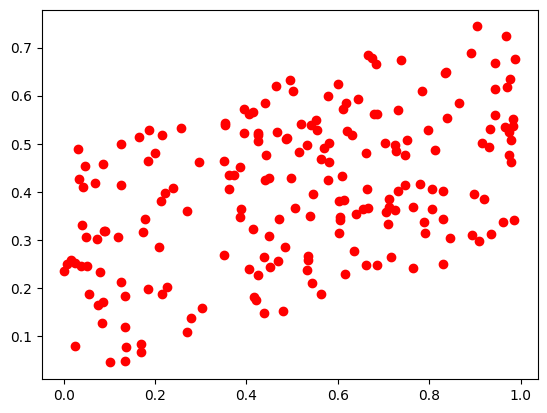

In [32]:
x_data = np.zeros(200)
y_data = np.zeros(200)
for i in range(200):
    x_data[i] = np.random.random()
    y_data[i] = 0.3 * x_data[i] + 0.5*np.random.random()
plt.scatter(x_data, y_data, color="red");

We can now customize this plot by switching on the default grid and setting the x and y range for plotting. For this, we can use a different interface, the `subplots` function, which provides us with direct access to the figure and the axes of the plot. We can use these two objects to adjust the plot range, the figure layout and the grid of the plot.

<span style="color:red">**TODO:** Use `ax.set_xlim` and `ax.set_ylim` to limit the plot range for the x-axis to 0.5 - 1.0. Switch on the grid for the plot.</span>    

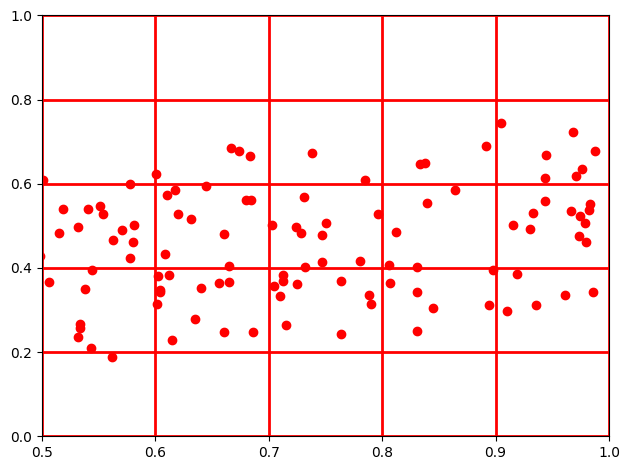

In [33]:
fig, ax = plt.subplots()

ax.set_ylim(0,1)
ax.set_xlim(0.5,1)
fig.tight_layout()
ax.scatter(x_data, y_data, color="red")
ax.grid(color='r', linewidth=2, linestyle='-')

plt.show()

We can also add labels to the x and the y-axis and we can change the font of the axis ticks. Labels can actually use LATEX code. With a call to `savefig`, we cal also save the plot to a `pdf` or `png` file.

<span style="color:red">**TODO:** Perform the modifications mentioned above and generate a pdf file of the scatter plot.</span>

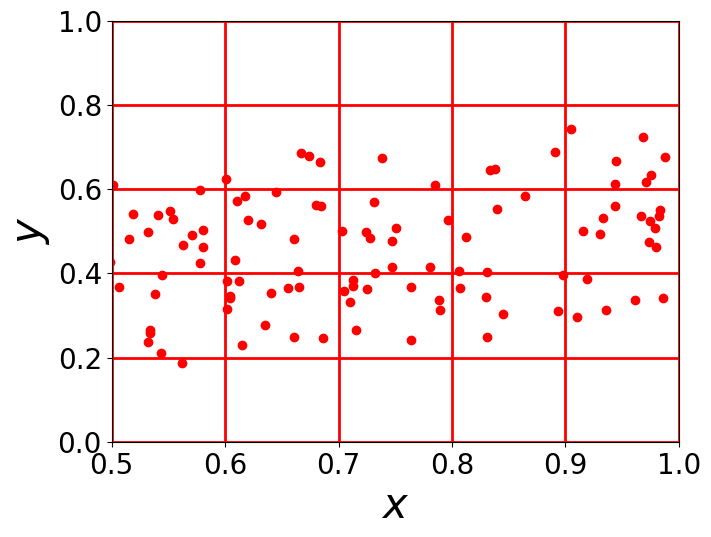

In [34]:
fig, ax = plt.subplots()

ax.set_ylim(0,1)
ax.set_xlim(0.5,1)
fig.tight_layout()
ax.scatter(x_data, y_data, color="red")
ax.grid(color='r', linewidth=2, linestyle='-')

ax.tick_params(which='major', labelsize=20)
ax.tick_params(which='minor', labelsize=20)
ax.set_xlabel(r'$x$', fontsize=30)
ax.set_ylabel(r'$y$', fontsize=30)
plt.savefig('02_scatter_plot.pdf')

plt.show()

A focus of the next few lectures will be on the degree distribution of a network. We can get the seqence of node degrees in `networkx` by calling the `degrees()` function of a network. We can then plot a histogram that gives us an idea about the distribution of degrees in the network.

<span style="color:red">**TODO:** Generate a histogram of node degrees for the example network `G`.</span>

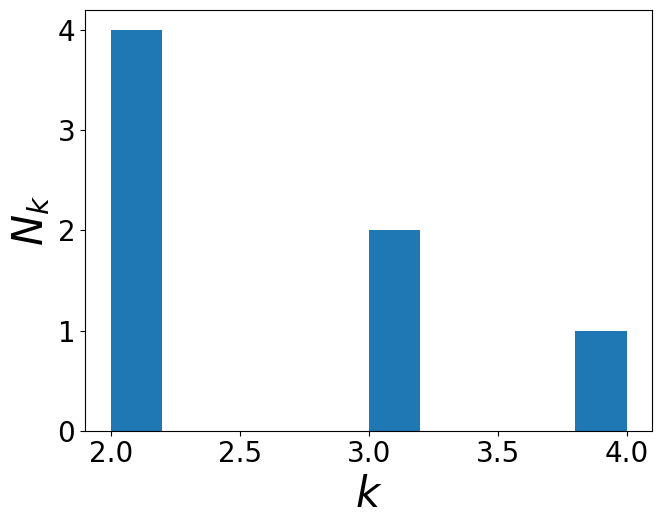

In [36]:
degree_values = [d for n, d in G.degree()]
fig, ax = plt.subplots()
fig.tight_layout()
ax.tick_params(which='major', labelsize=20)
ax.tick_params(which='minor', labelsize=20)
ax.set_xlabel(r'$k$', fontsize=30)
ax.set_ylabel(r'$N_k$', fontsize=30)
ax.hist(degree_values)
plt.show()

## 4. Sampling from distributions with `scipy`

The last section of this tutorial is devoted to advanced statistical features of `scipy`, provided in the `scipy.stats` package. Importantly, thus submodule of `scipy` provides implementations of various types of discrete and continuous probability distributions, which we will use throughout the course. These methods and classes will help us to generate samples from arbitrary distributions, thus complementing the simple random number generation functions provided by `numpy`.

Let us start the the normal distribution, which is implemented in the class `norm` in the submodule `scipy.stats`. For each distribution, we can output the basic central moments (e.g. mean, variance, skewness, kurtosis, etc., more on this later) using the method `stats`. We simply pass a string parameter `moments`, where each character is the first character of the moment that we want to calculate. To generate the mean and variance, we can pass `mv`.

<span style="color:red">**TODO:** Calculate the mean and variance of a standard normal distribution.</span>    

In [38]:
from scipy.stats import norm

mean, var = norm.stats(moments='mv')
print(mean)
print(var)

0.0
1.0


Especially when we want to fit a distribution to empirical data, it is useful to plot the probability distribution function. For this, we first need to generate `numpy` arrays that contain the values that we actually want to plot. 
s
Here, the `numpy.linspace(low, high, n)` function (which has the log-space equivalent `numpy.logspace`) comes in handy. We can use it to generate an array that contains a given number of `n` uniformly-spaced points in the interval `[low, high]`. To plot the probability distribution function, we first need the boundaries of the interval that we want to plot. We can use the function `ppf` to calculate those directly from the so-called percent point function `ppf(p)`, which is the inverse of the cumulative distribution minus the percentage `p`. This means that `ppf(0.01)` will return the value `x` such that 1 % of observations of a normally distributed random variable are smaller than `x`, while `ppf(0.99)` returns the value `x` such that 99 % of all observations are smaller than `x`. This allows us to conveniently get the boundaries of the interval. 

For each value `x` we can now use the method `pdf` to calculate the probability distribution function at the point `x`, and we can use the `matplotlib` function `plot` to generate a line plot of this function.

<span style="color:red">**TODO:** Plot the probability distribution function of a normal distribution.</span>    

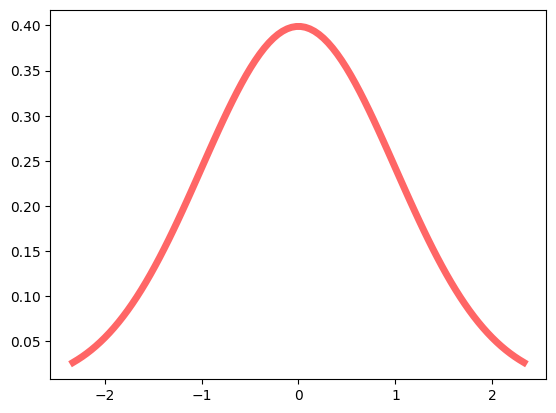

In [40]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf');

Apart from giving us access to the distribution functions and the moments of a wide array of statistical distributions, we can also generate random realisations of random variables with these distributions. For this, we can use the method `rvs`, which generates an arbitrary number of realisations for a given statistical distribution. 

Let us try this below by generating 500 realisation of a normally distributed random variable.

<span style="color:red">**TODO:** Plot a histogram of 500 random samples from a normal distribution, as well as the probability distribution function.</span>   

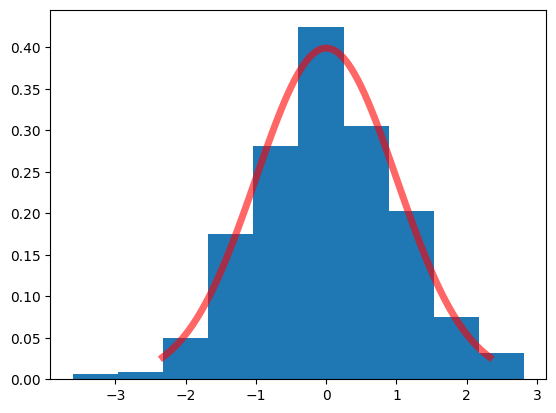

In [42]:
r = norm.rvs(size=500)
fig, ax = plt.subplots(1, 1)

x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6)
ax.hist(r, density=True);